1. Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
print("Libraries imported.")

Libraries imported.


2. Load and Prepare Data

In [23]:

# Load the dataset
file_path = '../data/boston_housing_mod.csv'
try:
    housing_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    display(housing_df.head())
    housing_df.info()
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    housing_df = None

if housing_df is not None:
    # Check for missing values
    print("\nMissing values:")
    print(housing_df.isnull().sum())

    # Separate target first
    y = housing_df['PRICE']
    X = housing_df.drop('PRICE', axis=1)

    # Apply one-hot encoding to features only
    X = pd.get_dummies(X, drop_first=True)

    print("\nShape of X (features):", X.shape)
    print("Shape of y (target):", y.shape)



Dataset loaded successfully.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,PRICE,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   PRICE               20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
PRICE                   0


3. Data Splitting (Training and Testing)
It is CRUCIAL to split your data into a training set (to fit the model) and a test set (to evaluate it on unseen data).

In [ ]:
if housing_df is not None:
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Check for missing values
    print("\nAny NaNs in X_train?", X_train.isnull().values.any())
    print("Any NaNs in X_test?", X_test.isnull().values.any())
    print("Any NaNs in y_train?", y_train.isnull().values.any())
    print("Any NaNs in y_test?", y_test.isnull().values.any())

    # Show count of NaNs per column (if any)
    print("\nNaN count per column in X_train:")
    print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

    print("\nNaN count per column in X_test:")
    print(X_test.isnull().sum()[X_test.isnull().sum() > 0])

    # Handle missing values by filling with column means (based on training data only)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean())

    # Train the linear regression model
    from sklearn.linear_model import LinearRegression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    print("\nLinear Regression model trained successfully.")

    # Make predictions on the test set
    try:
        y_pred = linear_model.predict(X_test)

        # Display a few actual vs. predicted values
        predictions_df = pd.DataFrame({
            'Actual_Price': y_test,
            'Predicted_Price': y_pred
        })
        predictions_df['Difference'] = predictions_df['Actual_Price'] - predictions_df['Predicted_Price']
        print("\nSample of actual vs. predicted prices:")
        display(predictions_df.head())

    except Exception as e:
        print("Error during prediction:", e)

X_train shape: (16512, 12)
X_test shape: (4128, 12)
y_train shape: (16512,)
y_test shape: (4128,)

Any NaNs in X_train? False
Any NaNs in X_test? True
Any NaNs in y_train? False
Any NaNs in y_test? False

NaN count per column in X_train:
Series([], dtype: int64)

NaN count per column in X_test:
total_bedrooms    207
dtype: int64

Linear Regression model trained successfully.

Sample of actual vs. predicted prices:


,Actual_Price,Predicted_Price,Difference
20046,47700.0,64693.827615,-16993.827615
3024,45800.0,134863.717653,-89063.717653
15663,500001.0,266127.758208,233873.241792
20484,218600.0,278640.810285,-60040.810285
9814,278000.0,273407.813532,4592.186468


4. Create and Train the Linear Regression Model

In [ ]:
if housing_df is not None:
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Check for missing values
    print("\nAny NaNs in X_train?", X_train.isnull().values.any())
    print("Any NaNs in X_test?", X_test.isnull().values.any())
    print("Any NaNs in y_train?", y_train.isnull().values.any())
    print("Any NaNs in y_test?", y_test.isnull().values.any())

    # Show count of NaNs per column (if any)
    print("\nNaN count per column in X_train:")
    print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

    print("\nNaN count per column in X_test:")
    print(X_test.isnull().sum()[X_test.isnull().sum() > 0])

    # Handle missing values by filling with column means (based on training data only)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean())


X_train shape: (16512, 12)
X_test shape: (4128, 12)
y_train shape: (16512,)
y_test shape: (4128,)

Any NaNs in X_train? False
Any NaNs in X_test? True
Any NaNs in y_train? False
Any NaNs in y_test? False

NaN count per column in X_train:
Series([], dtype: int64)

NaN count per column in X_test:
total_bedrooms    207
dtype: int64


5. Make Predictions

In [ ]:
if housing_df is not None:
    # Make predictions on the test set
    y_pred = linear_model.predict(X_test)

    # Display a few actual vs predicted values
    predictions_df = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})
    predictions_df['Difference'] = predictions_df['Actual_Price'] - predictions_df['Predicted_Price']
    print("\nSample of actual vs. predicted prices:")
    display(predictions_df.head())


Sample of actual vs. predicted prices:


,Actual_Price,Predicted_Price,Difference
20046,47700.0,64693.827615,-16993.827615
3024,45800.0,134863.717653,-89063.717653
15663,500001.0,266127.758208,233873.241792
20484,218600.0,278640.810285,-60040.810285
9814,278000.0,273407.813532,4592.186468


6. Evaluate the Model.

R-squared (R²): 0.6257
Mean Squared Error (MSE): 4904409297.4149
Root Mean Squared Error (RMSE): 70031.4879
Mean Absolute Error (MAE): 50702.1689


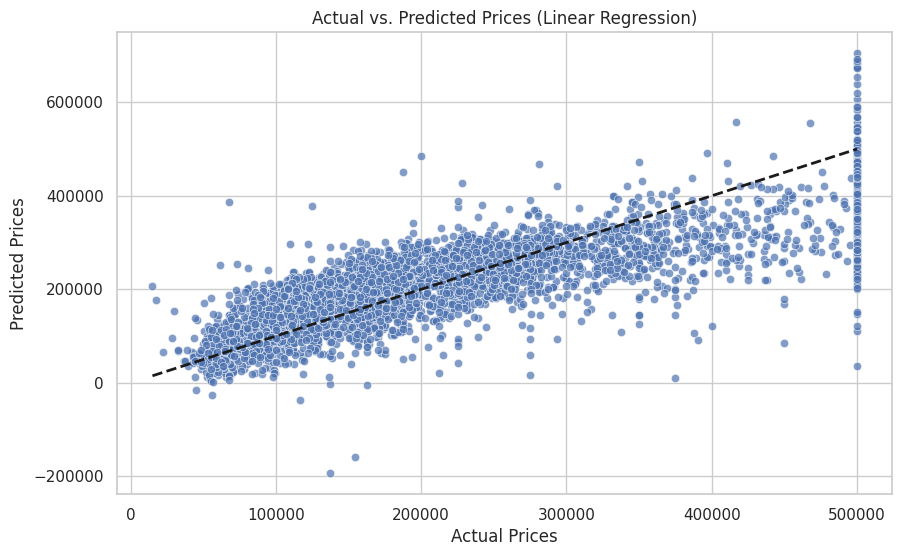

In [ ]:
if housing_df is not None:
    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.4f}")

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

    # Visualizing predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Linea de y=x
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs. Predicted Prices (Linear Regression)')
    plt.show()

In [27]:
if 'X_train' in locals(): # Check if X_train exists from previous cells
    scaler = StandardScaler()

    # Fit the scaler on the training data ONLY and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) # Use transform ONLY on test data

    print("Data scaled using StandardScaler.")
    print("X_train_scaled shape:", X_train_scaled.shape)
    
    # Now, you would train the LinearRegression model using X_train_scaled and y_train
    # And predict using X_test_scaled
    
    # --- Retrain model with scaled data ---
    linear_model_scaled = LinearRegression()
    linear_model_scaled.fit(X_train_scaled, y_train)
    
    y_pred_scaled = linear_model_scaled.predict(X_test_scaled)
    
    # Evaluate the scaled model
    r2_scaled = r2_score(y_test, y_pred_scaled)
    rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
    
    print(f"\n--- Results with Scaled Data ---")
    print(f"R-squared (R²): {r2_scaled:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.4f}")

    # Compare with previous R² and RMSE if you ran them before.
    # Often, for basic Linear Regression, scaling doesn't drastically change R² or RMSE,
    # but coefficients will change and be on a comparable scale.
    print("\nCoefficients with scaled data:")
    coefficients_scaled = pd.DataFrame(linear_model_scaled.coef_, X.columns, columns=['Coefficient_Scaled'])
    display(coefficients_scaled.sort_values(by='Coefficient_Scaled', ascending=False))